

# Project: Movies Data Analysis

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
# Introduction

In this project I will analyzing TMDB movies data, that’s contains all the details of movies between 1960 and 2015.to find the answers of my questions which is, Is there a positive relationship between the budget of the movie and the revenue its earns?,What is the most popular movie since 1960 until 2015?, Which film has the highest revenues since 1960 to 2005?,What is the relationship between popularity of the movie and the revenues its earns and finally Which genres are most popular from year to year?




In [2]:
# i will import all the liabraries that i will need 

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy 
from scipy.stats.stats import pearsonr
%matplotlib inline 

<a id='wrangling'></a>
# Movies Data Wrangling


### General Properties

In [3]:
# i will load the movies data frame

movies_df = pd.read_csv('movies.csv')
movies_df.head()

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08
3,140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,Every generation has a story.,...,Thirty years after defeating the Galactic Empi...,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09
4,168259,tt2820852,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,http://www.furious7.com/,James Wan,Vengeance Hits Home,...,Deckard Shaw seeks revenge against Dominic Tor...,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09


In [4]:
movies_df.shape

(10866, 21)

In [5]:
movies_df.describe()

,id,popularity,budget,revenue,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj
count,10866.000000,10866.000000,1.086600e+04,1.086600e+04,10866.000000,10866.000000,10866.000000,10866.000000,1.086600e+04,1.086600e+04
mean,66064.177434,0.646441,1.462570e+07,3.982332e+07,102.070863,217.389748,5.974922,2001.322658,1.755104e+07,5.136436e+07
std,92130.136561,1.000185,3.091321e+07,1.170035e+08,31.381405,575.619058,0.935142,12.812941,3.430616e+07,1.446325e+08
min,5.000000,0.000065,0.000000e+00,0.000000e+00,0.000000,10.000000,1.500000,1960.000000,0.000000e+00,0.000000e+00
25%,10596.250000,0.207583,0.000000e+00,0.000000e+00,90.000000,17.000000,5.400000,1995.000000,0.000000e+00,0.000000e+00
50%,20669.000000,0.383856,0.000000e+00,0.000000e+00,99.000000,38.000000,6.000000,2006.000000,0.000000e+00,0.000000e+00
75%,75610.000000,0.713817,1.500000e+07,2.400000e+07,111.000000,145.750000,6.600000,2011.000000,2.085325e+07,3.369710e+07
max,417859.000000,32.985763,4.250000e+08,2.781506e+09,900.000000,9767.000000,9.200000,2015.000000,4.250000e+08,2.827124e+09


In [6]:
movies_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    10866 non-null  int64  
 1   imdb_id               10856 non-null  object 
 2   popularity            10866 non-null  float64
 3   budget                10866 non-null  int64  
 4   revenue               10866 non-null  int64  
 5   original_title        10866 non-null  object 
 6   cast                  10790 non-null  object 
 7   homepage              2936 non-null   object 
 8   director              10822 non-null  object 
 9   tagline               8042 non-null   object 
 10  keywords              9373 non-null   object 
 11  overview              10862 non-null  object 
 12  runtime               10866 non-null  int64  
 13  genres                10843 non-null  object 
 14  production_companies  9836 non-null   object 
 15  release_date       

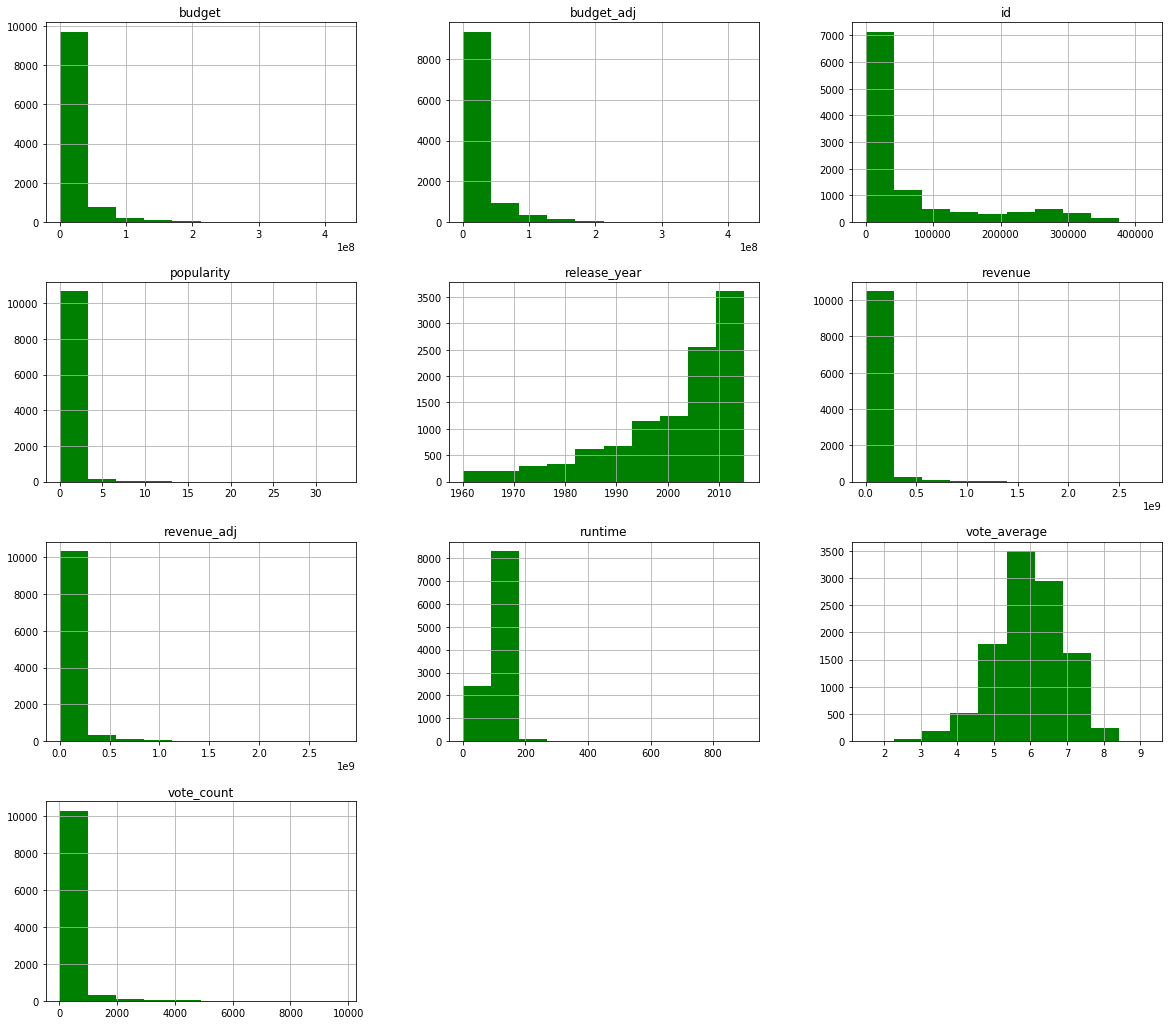

In [7]:
movies_df.hist(figsize=(20,18), color='green');



# Data Cleaning 

In [8]:
# i will drop all the columns that i will not need it 

movies_df.drop(['id','imdb_id','cast','homepage','tagline','overview','production_companies','keywords'], axis=1 ,inplace=True)

In [9]:
movies_df.head(100)

,popularity,budget,revenue,original_title,director,runtime,genres,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,32.985763,150000000,1513528810,Jurassic World,Colin Trevorrow,124,Action|Adventure|Science Fiction|Thriller,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,28.419936,150000000,378436354,Mad Max: Fury Road,George Miller,120,Action|Adventure|Science Fiction|Thriller,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,13.112507,110000000,295238201,Insurgent,Robert Schwentke,119,Adventure|Science Fiction|Thriller,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08
3,11.173104,200000000,2068178225,Star Wars: The Force Awakens,J.J. Abrams,136,Action|Adventure|Science Fiction|Fantasy,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09
4,9.335014,190000000,1506249360,Furious 7,James Wan,137,Action|Crime|Thriller,4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09
...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,1.841779,0,233755553,Alvin and the Chipmunks: The Road Chip,Walt Becker,92,Adventure|Animation|Comedy|Family,12/17/15,278,5.7,2015,0.000000e+00,2.150550e+08
96,1.823130,11930000,18340000,The Dressmaker,Jocelyn Moorhouse,118,Drama,10/1/15,197,6.9,2015,1.097560e+07,1.687279e+07
97,1.758618,8500000,43528634,The DUFF,Ari Sandel,100,Romance|Comedy,2/20/15,753,6.8,2015,7.819997e+06,4.004633e+07
98,1.742286,10000000,52882018,Sinister 2,Ciaran Foy,97,Horror,8/19/15,331,5.5,2015,9.199996e+06,4.865144e+07


In [10]:
sum(movies_df.duplicated())

1

In [11]:
movies_df.drop_duplicates(inplace = True)

In [12]:
sum(movies_df.duplicated())

0

In [13]:
# i will replace all zero's value in budget column with the mean

movies_df['budget'].mean()


14624286.06433502

In [14]:
movies_df['budget'].replace((0,14624286.06433502), inplace = True)

In [15]:
movies_df['budget']

0        150000000
1        150000000
2        110000000
3        200000000
4        190000000
           ...    
10861       700000
10862       700000
10863       700000
10864       700000
10865        19000
Name: budget, Length: 10865, dtype: int64

In [16]:
# i will replace all zero's value in revenue column with the mean


movies_df['revenue'].mean()

39826896.07685228

In [17]:
movies_df['revenue'].replace((0,39826896.07685228), inplace = True)

In [18]:
movies_df['revenue']

0        1513528810
1         378436354
2         295238201
3        2068178225
4        1506249360
            ...    
10861      12000000
10862      12000000
10863      12000000
10864      12000000
10865      12000000
Name: revenue, Length: 10865, dtype: int64

<a id='eda'></a>
## Exploratory Data Analysis


## Research Question 1 (	Is there a positive relationship between the budget of the movie and the revenue its earns? !)

In [19]:
# i will get the correlation between budget of movie and the revenue its earns
movies_df.corr()

,popularity,budget,revenue,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj
popularity,1.000000,0.497353,0.635990,0.139032,0.800828,0.209517,0.089806,0.513555,0.609085
budget,0.497353,1.000000,0.650202,0.158030,0.561826,0.068780,0.138633,0.835534,0.540964
revenue,0.635990,0.650202,1.000000,0.141358,0.746324,0.157429,0.046306,0.651664,0.858885
runtime,0.139032,0.158030,0.141358,1.000000,0.163273,0.156813,-0.117187,0.221127,0.175668
vote_count,0.800828,0.561826,0.746324,0.163273,1.000000,0.253818,0.107962,0.587062,0.707941
vote_average,0.209517,0.068780,0.157429,0.156813,0.253818,1.000000,-0.117576,0.093079,0.193062
release_year,0.089806,0.138633,0.046306,-0.117187,0.107962,-0.117576,1.000000,0.016771,-0.066236
budget_adj,0.513555,0.835534,0.651664,0.221127,0.587062,0.093079,0.016771,1.000000,0.646627
revenue_adj,0.609085,0.540964,0.858885,0.175668,0.707941,0.193062,-0.066236,0.646627,1.000000


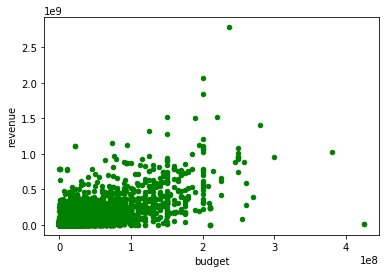

In [20]:
movies_df.plot(x="budget", y="revenue", kind="scatter" , color='green');

## Is there a positive relationship between the budget of the movie and the revenue its earns?

According to what is shown in the corrleation table and the scatter plot, the corrletion between budget of movie and the revenue it's 65%, so there is a positive reltationship between the and the budget has an impact to the revenue that movie will earns sometimes

## Research Question 2  (What is the most popular movie since 1960 until 2015?!)

In [21]:
# i will get the statistic tabele of popularity to know the max vaule in popularity columns
movies_df['popularity'].describe()

count    10865.000000
mean         0.646446
std          1.000231
min          0.000065
25%          0.207575
50%          0.383831
75%          0.713857
max         32.985763
Name: popularity, dtype: float64

In [22]:
# i will get the index of the movie that has the highest value in popularity columns
movies_df[movies_df['popularity'] == 32.985763]['popularity'].index

Int64Index([0], dtype='int64')

In [23]:
movies_df.iloc[0]

popularity                                          32.9858
budget                                            150000000
revenue                                          1513528810
original_title                               Jurassic World
director                                    Colin Trevorrow
runtime                                                 124
genres            Action|Adventure|Science Fiction|Thriller
release_date                                         6/9/15
vote_count                                             5562
vote_average                                            6.5
release_year                                           2015
budget_adj                                         1.38e+08
revenue_adj                                     1.39245e+09
Name: 0, dtype: object

# What is the most popular movie since 1960 until 2015?

The most popular movie according to the dataset since 1960 is Jurassic.

## Research Question 3  (Which film has the highest revenues since 1960 to 2005?!)


In [24]:
# i will get the statistic tabele of revenue to know the max vaule in popularity columns
movies_df['revenue'].describe()

count    1.086500e+04
mean     5.307419e+07
std      1.197344e+08
min      2.000000e+00
25%      1.914166e+06
50%      1.433440e+07
75%      4.741000e+07
max      2.781506e+09
Name: revenue, dtype: float64

In [25]:
# i will get the index of the movie that has the highest value in revenue columns
movies_df[movies_df['revenue'] ==  2.781506e+09]['revenue'].index

Int64Index([], dtype='int64')

In [26]:
movies_df.iloc[0]

popularity                                          32.9858
budget                                            150000000
revenue                                          1513528810
original_title                               Jurassic World
director                                    Colin Trevorrow
runtime                                                 124
genres            Action|Adventure|Science Fiction|Thriller
release_date                                         6/9/15
vote_count                                             5562
vote_average                                            6.5
release_year                                           2015
budget_adj                                         1.38e+08
revenue_adj                                     1.39245e+09
Name: 0, dtype: object

## Which film has the highest revenues since 1960 to 2005?!

we noticed that the film that has the highest revenue is the same movie that has the highest score of popularity 

## Research Question 3 ( What is the relationship between popularity of the movie and the revenues it earns?!)


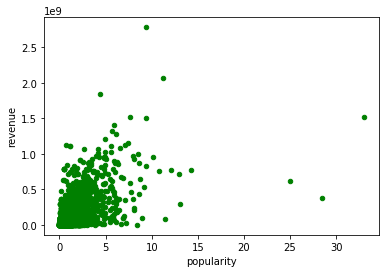

In [27]:
movies_df.plot(x="popularity", y="revenue", kind="scatter",color = 'green');

## What is the relationship between popularity of the movie and the revenues it earns?!


According to what is shown in the corrleation table and the scatter plot, the corrletion between popularity of movie and the revenue it's 63%, so there is a positive reltationship between them and the popularity has an impact to the revenue that movie will earns 

## Research Question 4 ( Which genres are most popular from year to year?!)


In [28]:
movies_df['genres'].describe()

count      10842
unique      2039
top       Comedy
freq         712
Name: genres, dtype: object

# Which genres are most popular from year to year?!

According to what is shown above the most popular type of the movies is Drama

## Research Question 5 (which films  have made the highest revenune old or new?!)


In [31]:
old = movies_df[movies_df['release_year'] < 2000]
new = movies_df[movies_df['release_year'] > 2000]

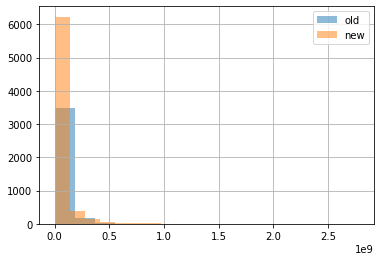

In [44]:
old['revenue'].hist(label = 'old' ,alpha=0.5,bins=10);
new['revenue'].hist(label = 'new' ,alpha=0.5, bins=20);
plt.legend();

# Which films  have made the highest revenune old or new?!

According to what is shown above the newest movies made revenue higher than the movies in the past 

<a id='conclusions'></a>
# Conclusions

According to the analysis that i have done it in this data set, i dicovered that  the budget and popularity have a positive impact on the revenue that movies will earn, that's why the most popular movie since 1960 is the same movie has the highest revenue. and also,  the movies recently made revenue higher than previously.
 
in conclusion, I was able to answer all my questions but encountered some obstacles, for example, I was unable to classify the genres of films according to revenue, i think because each row in genres column has multiple genres. So I think if the genres of films were arranged in a diffrent way, it would be better